# Time Series Auto-Correlations

Finding profiles in Time Series is a common task to perform. To highlight the presence of seasonal cycles on data, it is a genaral procedure to compute auto-correlations of time series to see if such cycles exsist.

As for ECDF and Performance, Time Series Toolbox provides a convenient method to compute auto-correlations.


## Introduction


### Imports

We import required packages:

In [7]:
import numpy as np
import pandas as pd
from odapi.connectors import Irceline

In [8]:
from odapi.settings import settings
settings.logger.setLevel(40)

### Dataset & Client

We load the dataset we previously stored and create the Irceline client:

In [9]:
data = pd.read_pickle("dump/brussels_2014.pickle")
client = Irceline()

## Auto-Correlations

As we did previously with ECDF and Performance, we apply `autocorr` method:

In [10]:
ac = data.apply(client.autocorr)

We can see results for the first and last computed lags:

In [11]:
ac.filter(regex='NO.*/41R0(02|12)')

seriekey,NO/41R002 (µg/m³),NO/41R012 (µg/m³),NO2/41R002 (µg/m³),NO2/41R012 (µg/m³)
sitekey,41R002,41R012,41R002,41R012
measurekey,NO,NO,NO2,NO2
serieid,6614,6621,6615,6622
0,1.000000,1.000000,1.000000,1.000000
1,0.832317,0.832810,0.882244,0.898011
2,0.644643,0.662305,0.744318,0.770161
3,0.479040,0.545301,0.602626,0.651236
4,0.348700,0.450917,0.475803,0.554332
...,...,...,...,...
416,-0.048016,-0.000857,-0.087580,0.018795


Graphically, it renders as follow:

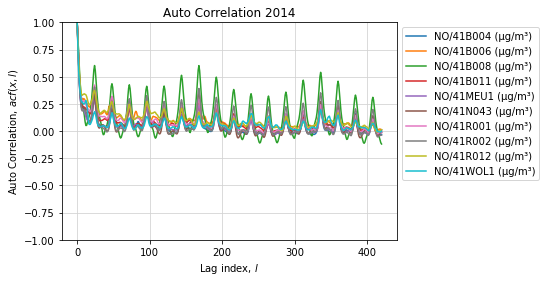

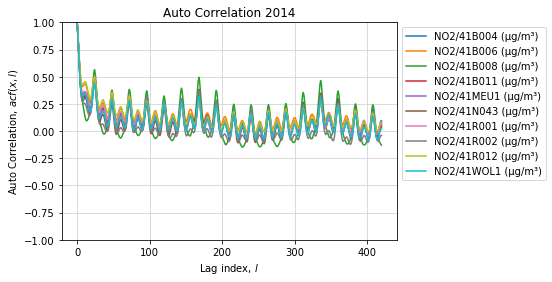

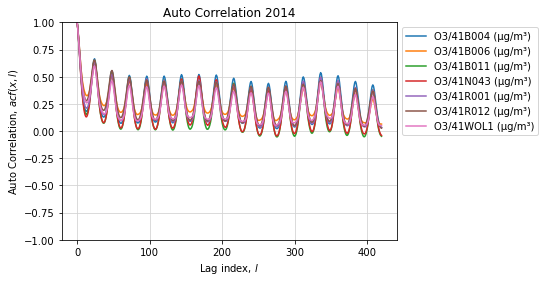

In [12]:
for k in ['NO', 'NO2', 'O3']:#ac.columns.levels[2]:
    axe = ac.filter(regex='{}/'.format(k)).droplevel([1,2,3], axis=1).plot()
    axe.set_title("Auto Correlation 2014")
    axe.set_xlabel("Lag index, $l$")
    axe.set_ylabel("Auto Correlation, $acf(x, l)$")
    axe.set_ylim([-1, 1])
    lgd = axe.legend(bbox_to_anchor=(1, 1), loc='upper left')
    axe.grid(which='both', color='lightgray')